# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'.

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I.
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II.
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III.
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'.

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




Столбец №2

In [1]:
N = 2
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col_name = cols[N % 7]
col_name

'Exercise_Hours'

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('teen_phone_addiction_dataset.csv')
data = df[col_name]

In [4]:
mean = data.mean()
variance = data.var()
mode = data.mode()[0]
median = data.median()
quantiles = data.quantile([0.25, 0.5, 0.75])
kurtosis = data.kurtosis()
skewness = data.skew()
iqr = quantiles[0.75] - quantiles[0.25]

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Mode: {mode}")
print(f"Median: {median}")
print(f"Quantiles:\n{quantiles}")
print(f"Kurtosis: {kurtosis}")
print(f"Skewness: {skewness}")
print(f"IQR: {iqr}")

Mean: 1.0406666666666666
Variance: 0.5396661109258619
Mode: 0.0
Median: 1.0
Quantiles:
0.25    0.5
0.50    1.0
0.75    1.5
Name: Exercise_Hours, dtype: float64
Kurtosis: -0.2574880012747749
Skewness: 0.43863850250855985
IQR: 1.0


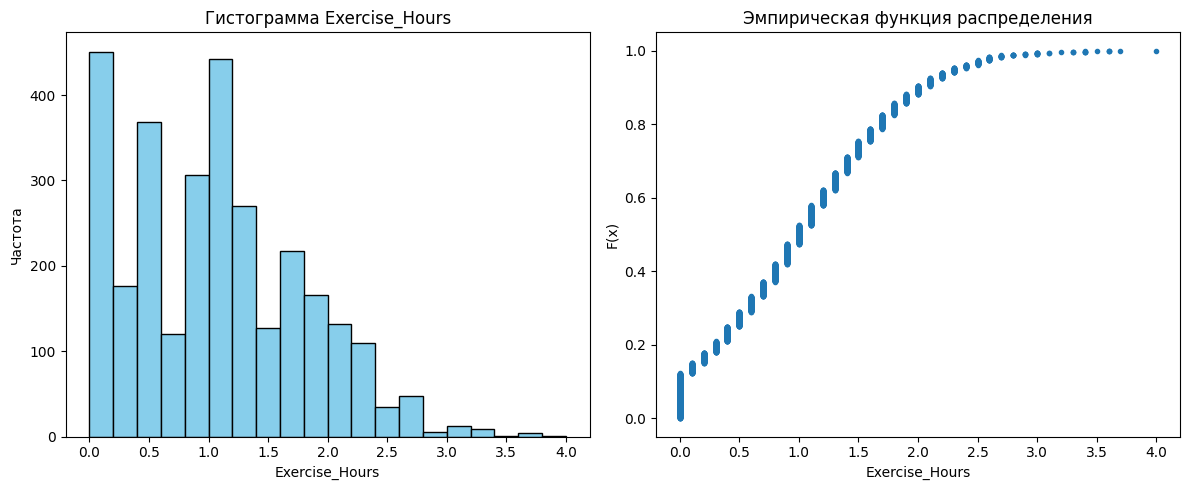

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(data, bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма {}'.format(col_name))
axes[0].set_xlabel(col_name)
axes[0].set_ylabel('Частота')

sorted_data = np.sort(data)
y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, y_vals, marker='.', linestyle='none')
axes[1].set_title('Эмпирическая функция распределения')
axes[1].set_xlabel(col_name)
axes[1].set_ylabel('F(x)')

plt.tight_layout()
plt.show()

Распределение бимодальное. По значениям среднего, моды и смещения можно понять, что распределение смещено вправо

## II

In [6]:
def chi_square(data, bins=10, alpha=0.05):
    observed_freq, bin_edges = np.histogram(data, bins=bins)
    mu, sigma = np.mean(data), np.std(data)
    expected_freq = []

    for i in range(len(bin_edges)-1):
        prob = stats.norm.cdf(bin_edges[i+1], mu, sigma) - stats.norm.cdf(bin_edges[i], mu, sigma)
        expected_freq.append(prob * len(data))

    expected_freq = np.array(expected_freq)
    mask = expected_freq >= 5
    observed_freq = observed_freq[mask]
    expected_freq = expected_freq[mask]
    chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)

    df = len(observed_freq) - 1 - 2
    critical_value = stats.chi2.ppf(1 - alpha, df)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)

    return chi2_stat, p_value, critical_value, p_value > alpha

In [7]:
chi_square_result = chi_square(data)
chi_square_result

(np.float64(334.931099583544),
 np.float64(0.0),
 np.float64(11.070497693516351),
 np.False_)

In [8]:
_, p_val = stats.normaltest(data)
p_val

np.float64(2.7112493973078964e-22)

Text(0.5, 1.0, 'Q-Q Plot')

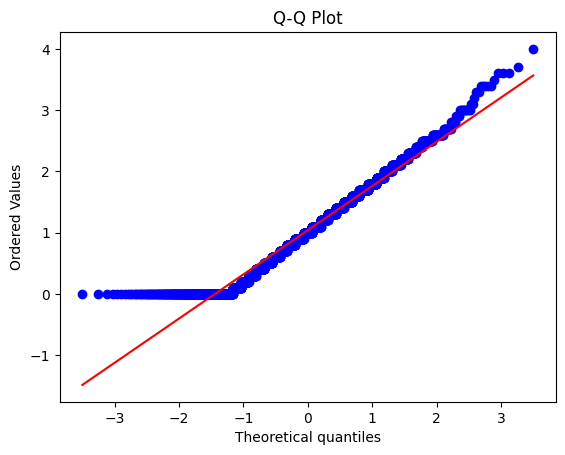

In [9]:
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")

На графике видно, что на концах распределение отличается от нормального. По chi-квадрату можно сказать, что распределение не нормальное.

## III

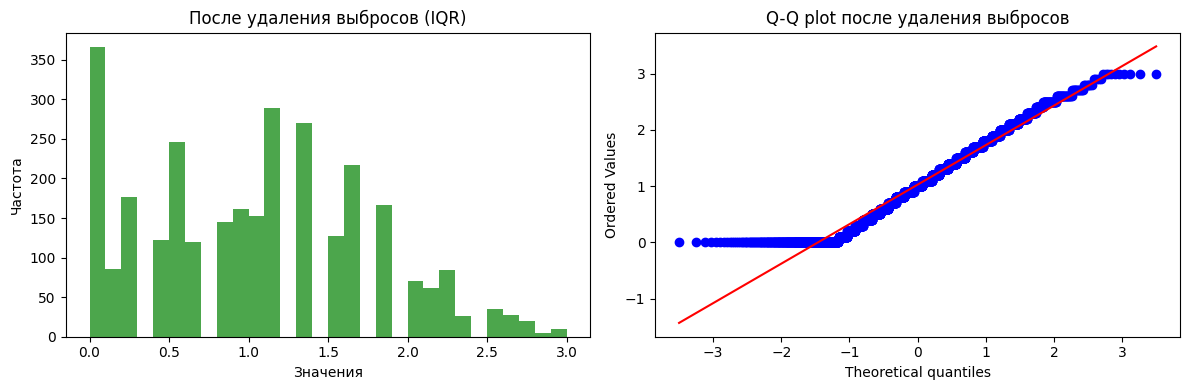

После удаления выбросов: Среднее = 1.0271, Стандартное отклонение = 0.7140


In [10]:
# 1. Удаление выбросов (метод IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data_no_outliers, bins=30, alpha=0.7, color='green')
plt.title('После удаления выбросов (IQR)')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
stats.probplot(data_no_outliers, dist="norm", plot=plt)
plt.title('Q-Q plot после удаления выбросов')
plt.tight_layout()
plt.show()

print(f"После удаления выбросов: Среднее = {data_no_outliers.mean():.4f}, Стандартное отклонение = {data_no_outliers.std():.4f}")

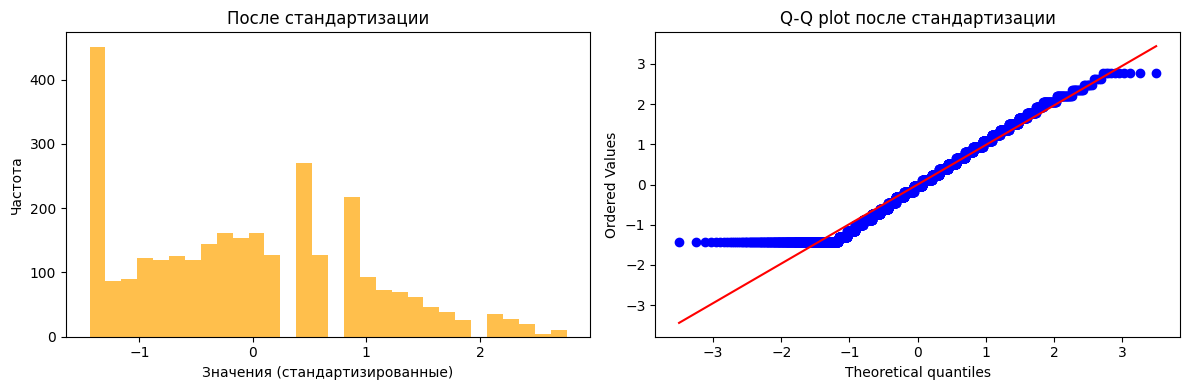

После стандартизации: Среднее = -0.0000, Стандартное отклонение = 1.0000


In [11]:
data_standardized = (data_no_outliers - data_no_outliers.mean()) / data_no_outliers.std()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data_standardized, bins=30, alpha=0.7, color='orange')
plt.title('После стандартизации')
plt.xlabel('Значения (стандартизированные)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
stats.probplot(data_standardized, dist="norm", plot=plt)
plt.title('Q-Q plot после стандартизации')
plt.tight_layout()
plt.show()

print(f"После стандартизации: Среднее = {data_standardized.mean():.4f}, Стандартное отклонение = {data_standardized.std():.4f}")

Минимальное значение: 0.0
Добавлена константа: 1.0


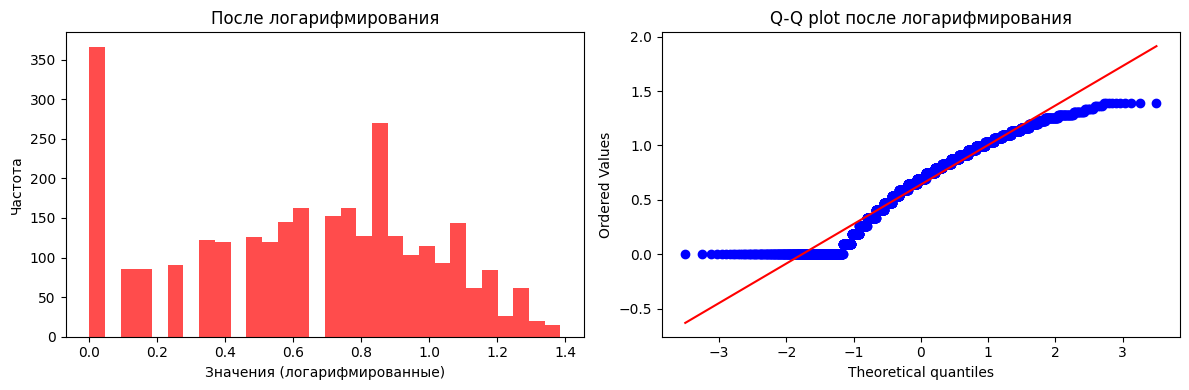

После логарифмирования: Среднее = 0.6405, Стандартное отклонение = 0.3719


In [12]:
print(f"Минимальное значение: {data_no_outliers.min()}")

if data_no_outliers.min() <= 0:
    shift_constant = abs(data_no_outliers.min()) + 1
    data_shifted = data_no_outliers + shift_constant
    print(f"Добавлена константа: {shift_constant}")
else:
    data_shifted = data_no_outliers
    shift_constant = 0

data_log = np.log(data_shifted)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data_log, bins=30, alpha=0.7, color='red')
plt.title('После логарифмирования')
plt.xlabel('Значения (логарифмированные)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
stats.probplot(data_log, dist="norm", plot=plt)
plt.title('Q-Q plot после логарифмирования')
plt.tight_layout()
plt.show()

print(f"После логарифмирования: Среднее = {data_log.mean():.4f}, Стандартное отклонение = {data_log.std():.4f}")

После логарифмирования данные меньше похожи на нормальное распределение, что можно видеть например из Q-Q plot

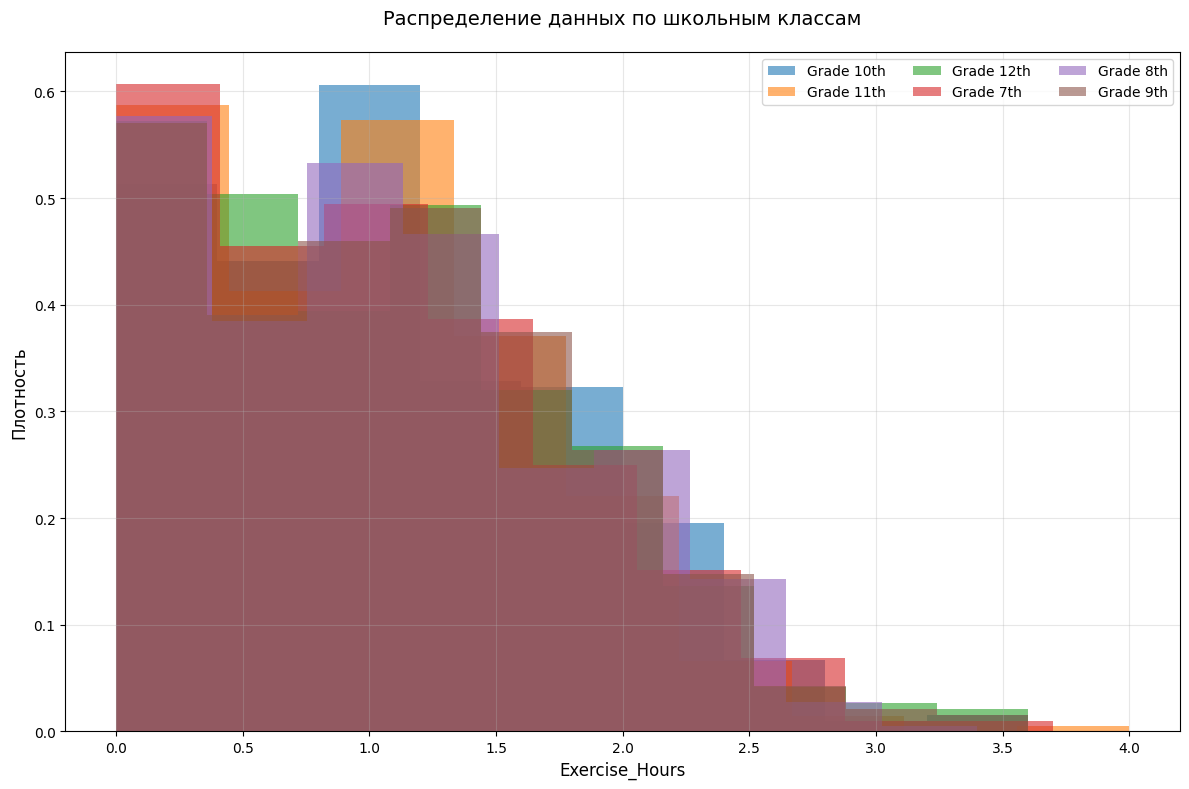

Статистики по группам School_Grade:
----------------------------------------
              Среднее  Дисперсия  Количество
School_Grade                                
10th           1.0425     0.5365         487
11th           0.9795     0.4867         479
12th           1.0459     0.5642         529
7th            1.0296     0.5324         497
8th            1.0620     0.5517         482
9th            1.0802     0.5617         526


In [13]:
groups = df.groupby("School_Grade")

plt.figure(figsize=(12, 8))

n_grades = len(groups)
ncols = min(3, n_grades)

for grade, subset in groups:
    k = 1 + int(np.log2(len(subset)))
    plt.hist(subset[col_name], bins=k, alpha=0.6, label=f"Grade {grade}", density=True)

plt.xlabel(col_name, fontsize=12)
plt.ylabel("Плотность", fontsize=12)
plt.title("Распределение данных по школьным классам", fontsize=14, pad=20)
plt.legend(ncol=ncols, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

stats_by_grade = groups[col_name].agg(['mean', 'var', 'count']).round(4)
stats_by_grade.columns = ['Среднее', 'Дисперсия', 'Количество']

print("Статистики по группам School_Grade:")
print("-" * 40)
print(stats_by_grade)

Данные по разным классам имеют схожее распределение